In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df1 = df.reset_index()['hourly_traffic_count']
df1 = df1.iloc[:9792,]

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [6]:
window = 1
X,y = create_dataset(df1,window)

In [7]:
X.shape, y.shape

((9790, 1), (9790,))

In [8]:
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
X_train, X_test = X[0:training_size,:], X[training_size:,:]

In [9]:
X_train.shape , X_test.shape

((7833, 1), (1957, 1))

In [10]:
y_train, y_test = y[0:training_size,], y[training_size:,]

In [11]:
y_train.shape , y_test.shape

((7833,), (1957,))

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Model

In [13]:
from keras.layers import LSTM

In [14]:
model = Sequential()
model.add(LSTM(32, return_sequences=True,input_shape=(1, 1)))
model.add(LSTM(32,return_sequences = True))
model.add(LSTM(32,return_sequences = True))
model.add(LSTM(32,return_sequences = True))
model.add(LSTM(32,return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1))
opt_adam  = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=opt_adam ,loss='mean_squared_error')

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
245/245 [==============================] - 2s 6ms/step - loss: 0.0351
Epoch 2/10
245/245 [==============================] - 2s 6ms/step - loss: 0.0067
Epoch 3/10
245/245 [==============================] - 2s 6ms/step - loss: 0.0065
Epoch 4/10
245/245 [==============================] - 2s 6ms/step - loss: 0.0065
Epoch 5/10
245/245 [==============================] - 2s 6ms/step - loss: 0.0065
Epoch 6/10
245/245 [==============================] - 2s 6ms/step - loss: 0.0065
Epoch 7/10
245/245 [==============================] - 2s 6ms/step - loss: 0.0065
Epoch 8/10
245/245 [==============================] - 2s 7ms/step - loss: 0.0065
Epoch 9/10
245/245 [==============================] - 2s 6ms/step - loss: 0.0065
Epoch 10/10
245/245 [==============================] - 2s 6ms/step - loss: 0.0065


In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [17]:
X_test.shape

(1957, 1, 1)

In [18]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [19]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

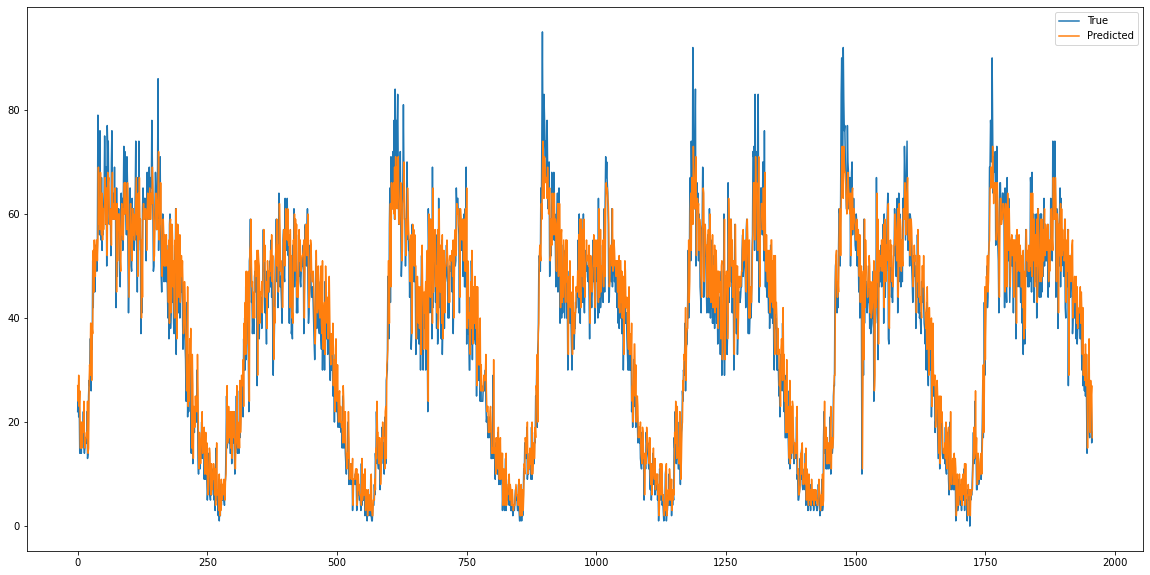

In [20]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='True')
plt.plot(test_predict, label = 'Predicted')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 9.098711123464682
MAE-train: 6.773266947529682
R_2-train: 0.8515234417396788


In [22]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-train:',r2_score(y_test,test_predict))

RMSE-test: 8.522566155705997
MAE-test: 6.469596320899336
R_2-train: 0.8249703593938572
